In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import metrics
import numpy as np
import statsmodels

In [2]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        

In [26]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))

def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [27]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        

In [28]:

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))


def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected

In [29]:
df1 = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Pauses/b1_pause.csv")
df2 = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Pauses/b2_pause.csv")
df3 = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/ITALIAN_PD/Acoustic/Pauses/fb1_pause.csv")

In [30]:
tot = pd.concat([df1,df2, df3 ])
tot['label']=tot['AudioFile'].str.split('_').str[0]
df_30msec = tot
tasks = []
names = df_30msec['AudioFile'].tolist()
for e in names:
    ok = e.split("_", 3)[3]
    ok = ok[:2]
    tasks.append(ok)
df_30msec['tasks'] = tasks
df = df_30msec

In [34]:
#here we extract the values by task
task_grouped_= df.groupby('tasks')
B1 = task_grouped_.get_group("B1")
B2 = task_grouped_.get_group("B2")
FB1 = task_grouped_.get_group("FB")

## First Read Passage

In [ ]:
grouped = B1.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = B1.columns[1:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(B1.columns[1:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(B1.columns[1:-4])])

with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/VAD/Results/b1_rt.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/VAD/Results/b1_rt.txt')
holm_correction(kruskal_1)

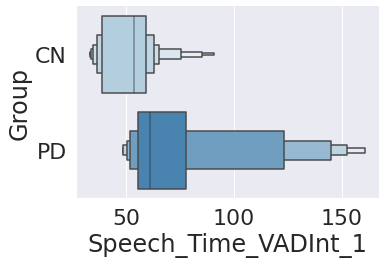

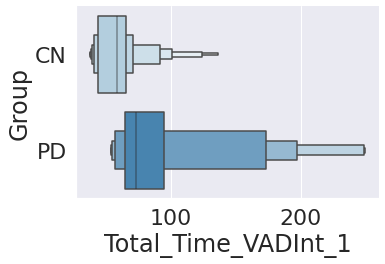

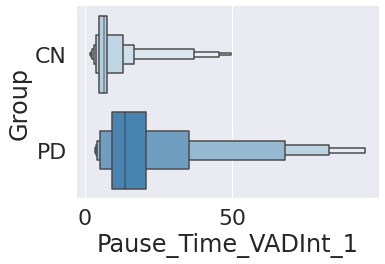

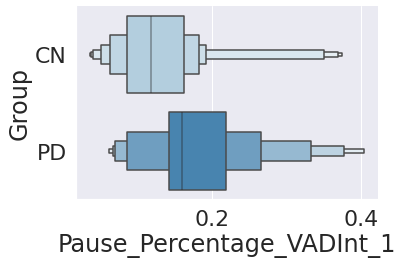

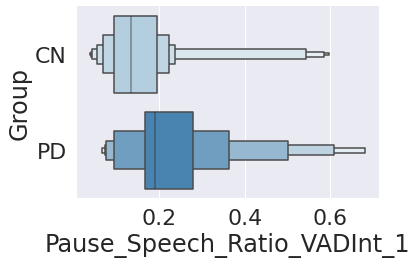

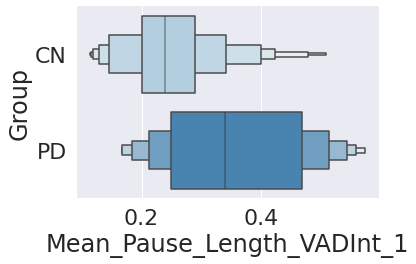

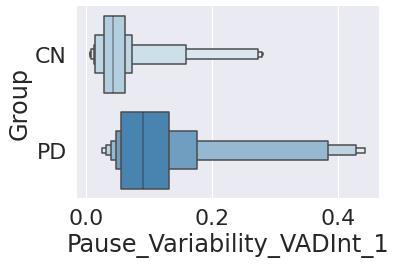

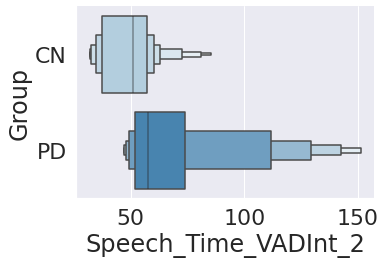

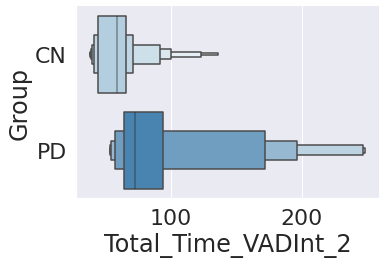

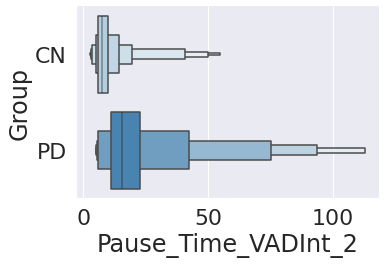

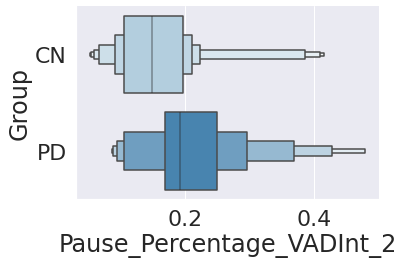

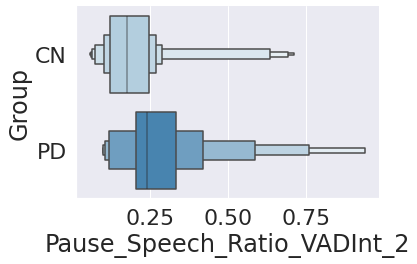

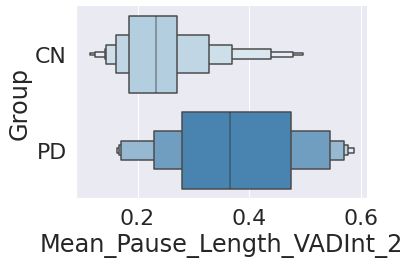

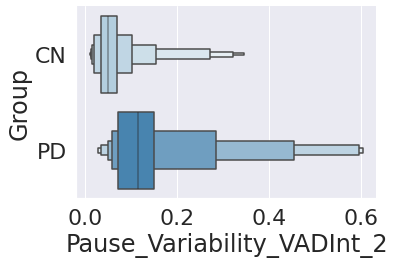

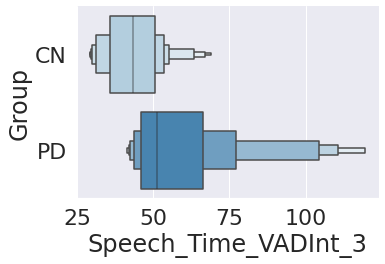

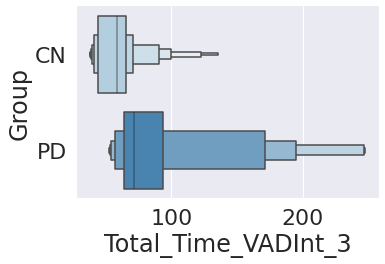

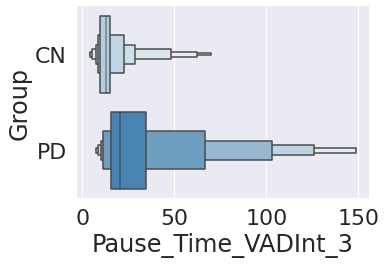

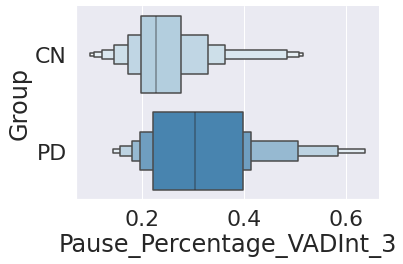

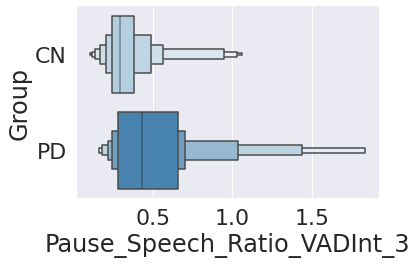

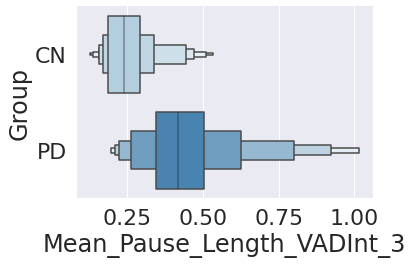

In [36]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

## Second Read Passage 


In [37]:
grouped = B2.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = B2.columns[1:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(B2.columns[1:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(B2.columns[1:-4])])

with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/VAD/Results/b2_rt.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/VAD/Results/b2_rt.txt')
holm_correction(kruskal_1)

(['kruskal results for Speech_Time_VADInt_1 controls vs. parkinson 0.015409969058046254 ',
  'kruskal results for Total_Time_VADInt_1 controls vs. parkinson 0.0020279235771930356 ',
  'kruskal results for Pause_Time_VADInt_1 controls vs. parkinson 0.004414190239150628 ',
  'kruskal results for Pause_Percentage_VADInt_1 controls vs. parkinson 0.0345190345576927 ',
  'kruskal results for Pause_Speech_Ratio_VADInt_1 controls vs. parkinson 0.0345190345576927 ',
  'kruskal results for Mean_Pause_Length_VADInt_1 controls vs. parkinson 0.0014796314316670523 ',
  'kruskal results for Pause_Variability_VADInt_1 controls vs. parkinson 0.000212829419014376 ',
  'kruskal results for Speech_Time_VADInt_2 controls vs. parkinson 0.03321717486456891 ',
  'kruskal results for Total_Time_VADInt_2 controls vs. parkinson 0.0027581107576226515 ',
  'kruskal results for Pause_Time_VADInt_2 controls vs. parkinson 0.004980056398497917 ',
  'kruskal results for Pause_Percentage_VADInt_2 controls vs. parkinson 

## Text Dependent Utterances (TDUs)

In [38]:
grouped = FB1.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = FB1.columns[1:-4].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(FB1.columns[1:-4])])
control_all_feat = np.array([control[feat] for feat in np.array(FB1.columns[1:-4])])

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        
with open('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/VAD/Results/fb1_rt.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/ITALIAN/ACOUSTIC/VAD/Results/fb1_rt.txt')
holm_correction(kruskal_1)

(['kruskal results for Total_Time_VADInt_1 controls vs. parkinson 0.027520106937527728 ',
  'kruskal results for Pause_Time_VADInt_1 controls vs. parkinson 0.005229875878698431 ',
  'kruskal results for Pause_Percentage_VADInt_1 controls vs. parkinson 0.009039437661795931 ',
  'kruskal results for Pause_Speech_Ratio_VADInt_1 controls vs. parkinson 0.009039437661795931 ',
  'kruskal results for Mean_Pause_Length_VADInt_1 controls vs. parkinson 0.016548936587871467 ',
  'kruskal results for Pause_Variability_VADInt_1 controls vs. parkinson 0.018583470634128654 ',
  'kruskal results for Total_Time_VADInt_2 controls vs. parkinson 0.03790797058906499 ',
  'kruskal results for Pause_Time_VADInt_2 controls vs. parkinson 0.0027371687669419213 ',
  'kruskal results for Pause_Percentage_VADInt_2 controls vs. parkinson 0.0038679695040220057 ',
  'kruskal results for Pause_Speech_Ratio_VADInt_2 controls vs. parkinson 0.0038679695040220057 ',
  'kruskal results for Mean_Pause_Length_VADInt_2 contro

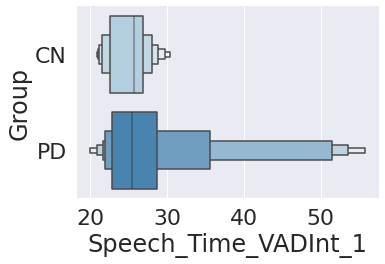

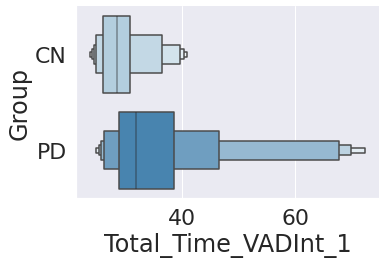

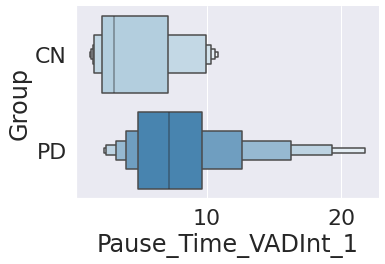

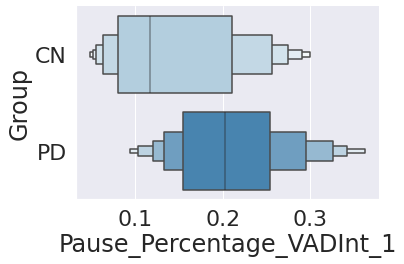

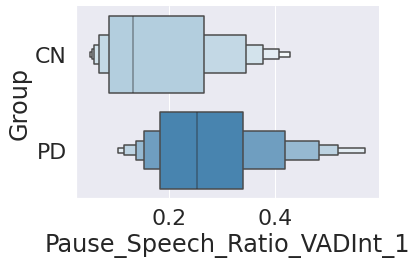

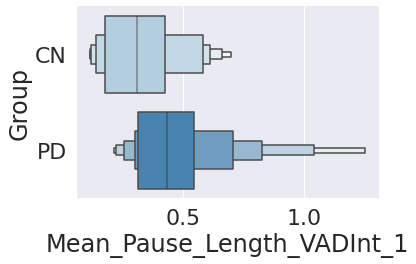

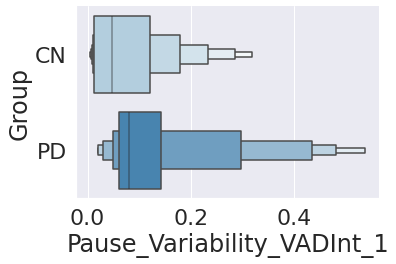

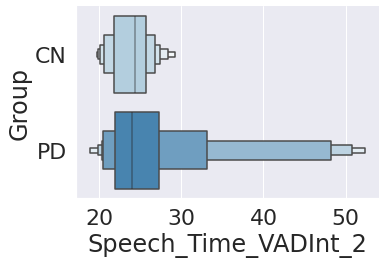

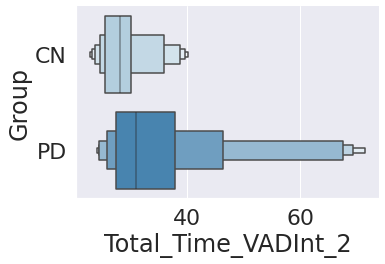

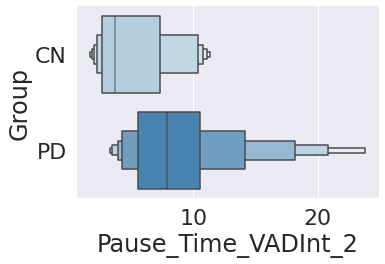

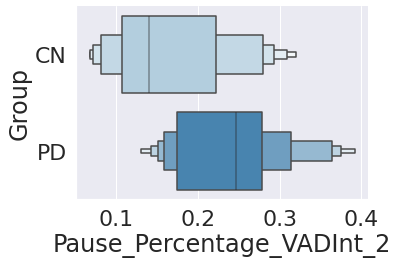

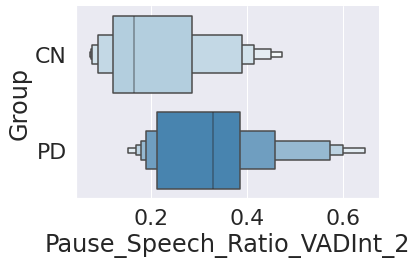

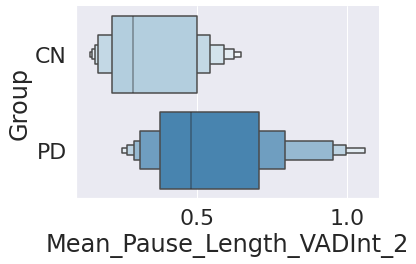

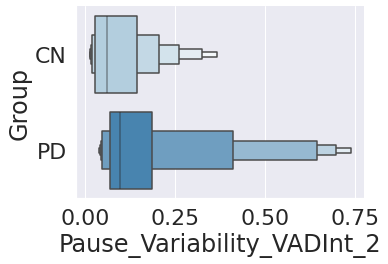

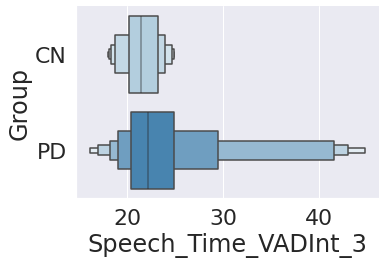

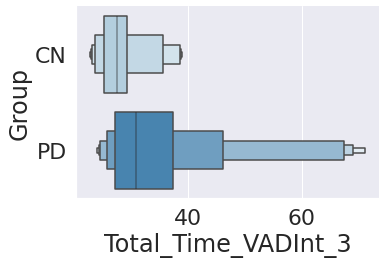

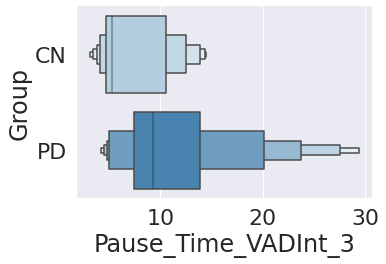

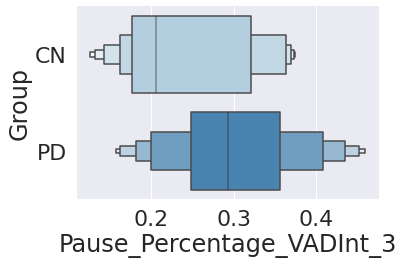

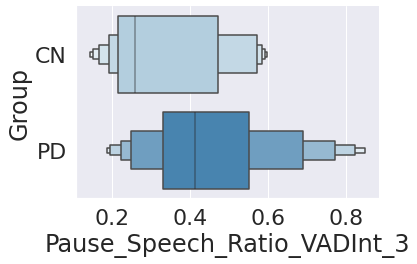

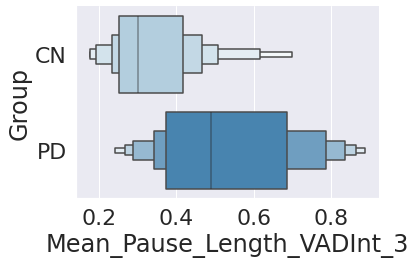

In [39]:
for i, title in enumerate(task):
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)